In [44]:
# importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [45]:
# loading the dataset
# Load the CSV files into pandas dataframes
gender_submission_df = pd.read_csv('./dataset/gender_submission.csv')
test_df = pd.read_csv('./dataset/test.csv')
train_df = pd.read_csv('./dataset/train.csv')


In [46]:
# Exploratory Data Analysis
# Display the first 5 rows of the dataset
print(train_df.head())

# Display the last 5 rows of the dataset
print(train_df.tail())

# Display the shape of the dataset
train_df.shape



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

(891, 12)

In [47]:
# Display the information of the dataset
train_df.info()

# Display the summary statistics of the dataset
train_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
# Data Preprocessing
# Check for missing values

# Check for missing values in the dataset
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
# handling missing values
# Drop the 'Cabin' column
train_df.drop('Cabin', axis=1, inplace=True)

# Fill the missing values in the 'Age' column with the mean value
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)

# Fill the missing values in the 'Embarked' column with the mode value
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


/tmp/ipykernel_24818/726172688.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
/tmp/ipykernel_24818/726172688.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

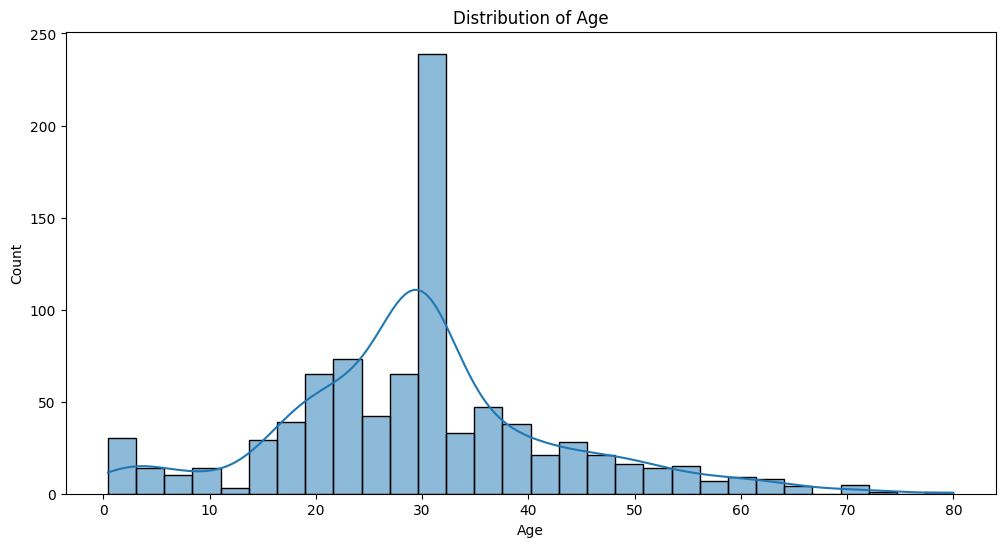

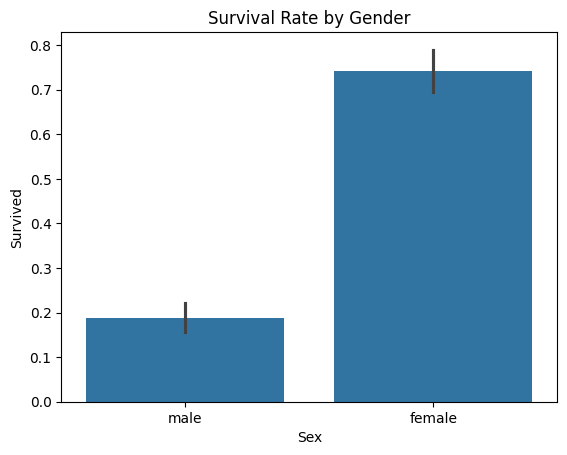

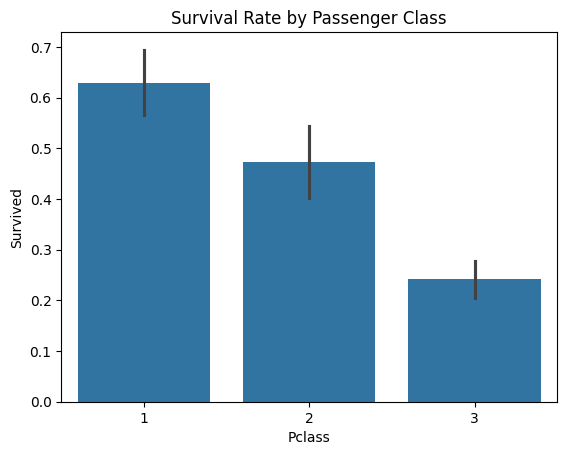

In [50]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Histogram of Ages
sns.histplot(train_df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

# Bar plot of survival by sex
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Gender')
plt.show()

# Bar plot of survival by passenger class
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Passenger Class')
plt.show()


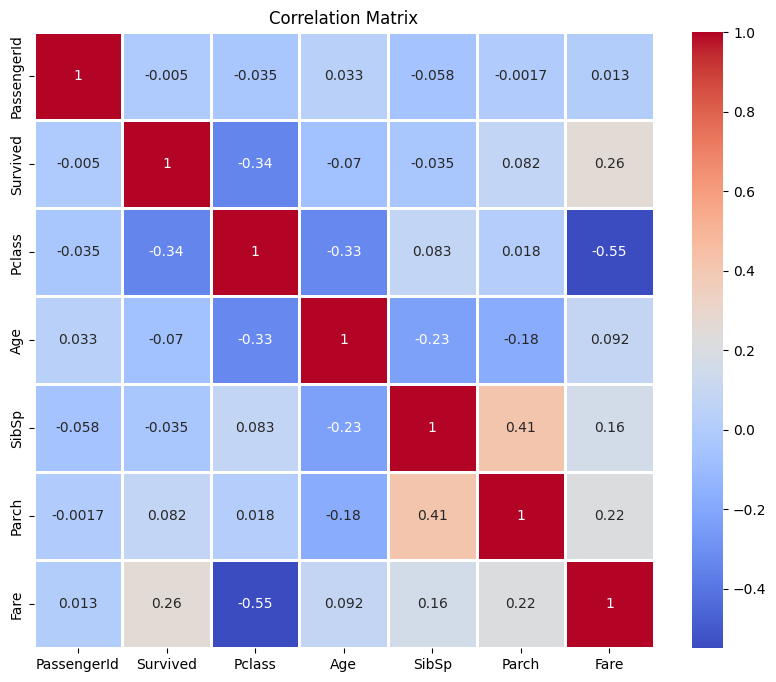

In [51]:
# Select only numeric columns for correlation
numeric_data = train_df.select_dtypes(include=[np.number])

# Optionally, handle missing values if there are any
numeric_data.fillna(numeric_data.median(), inplace=True)

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=2)
plt.title('Correlation Matrix')
plt.show()



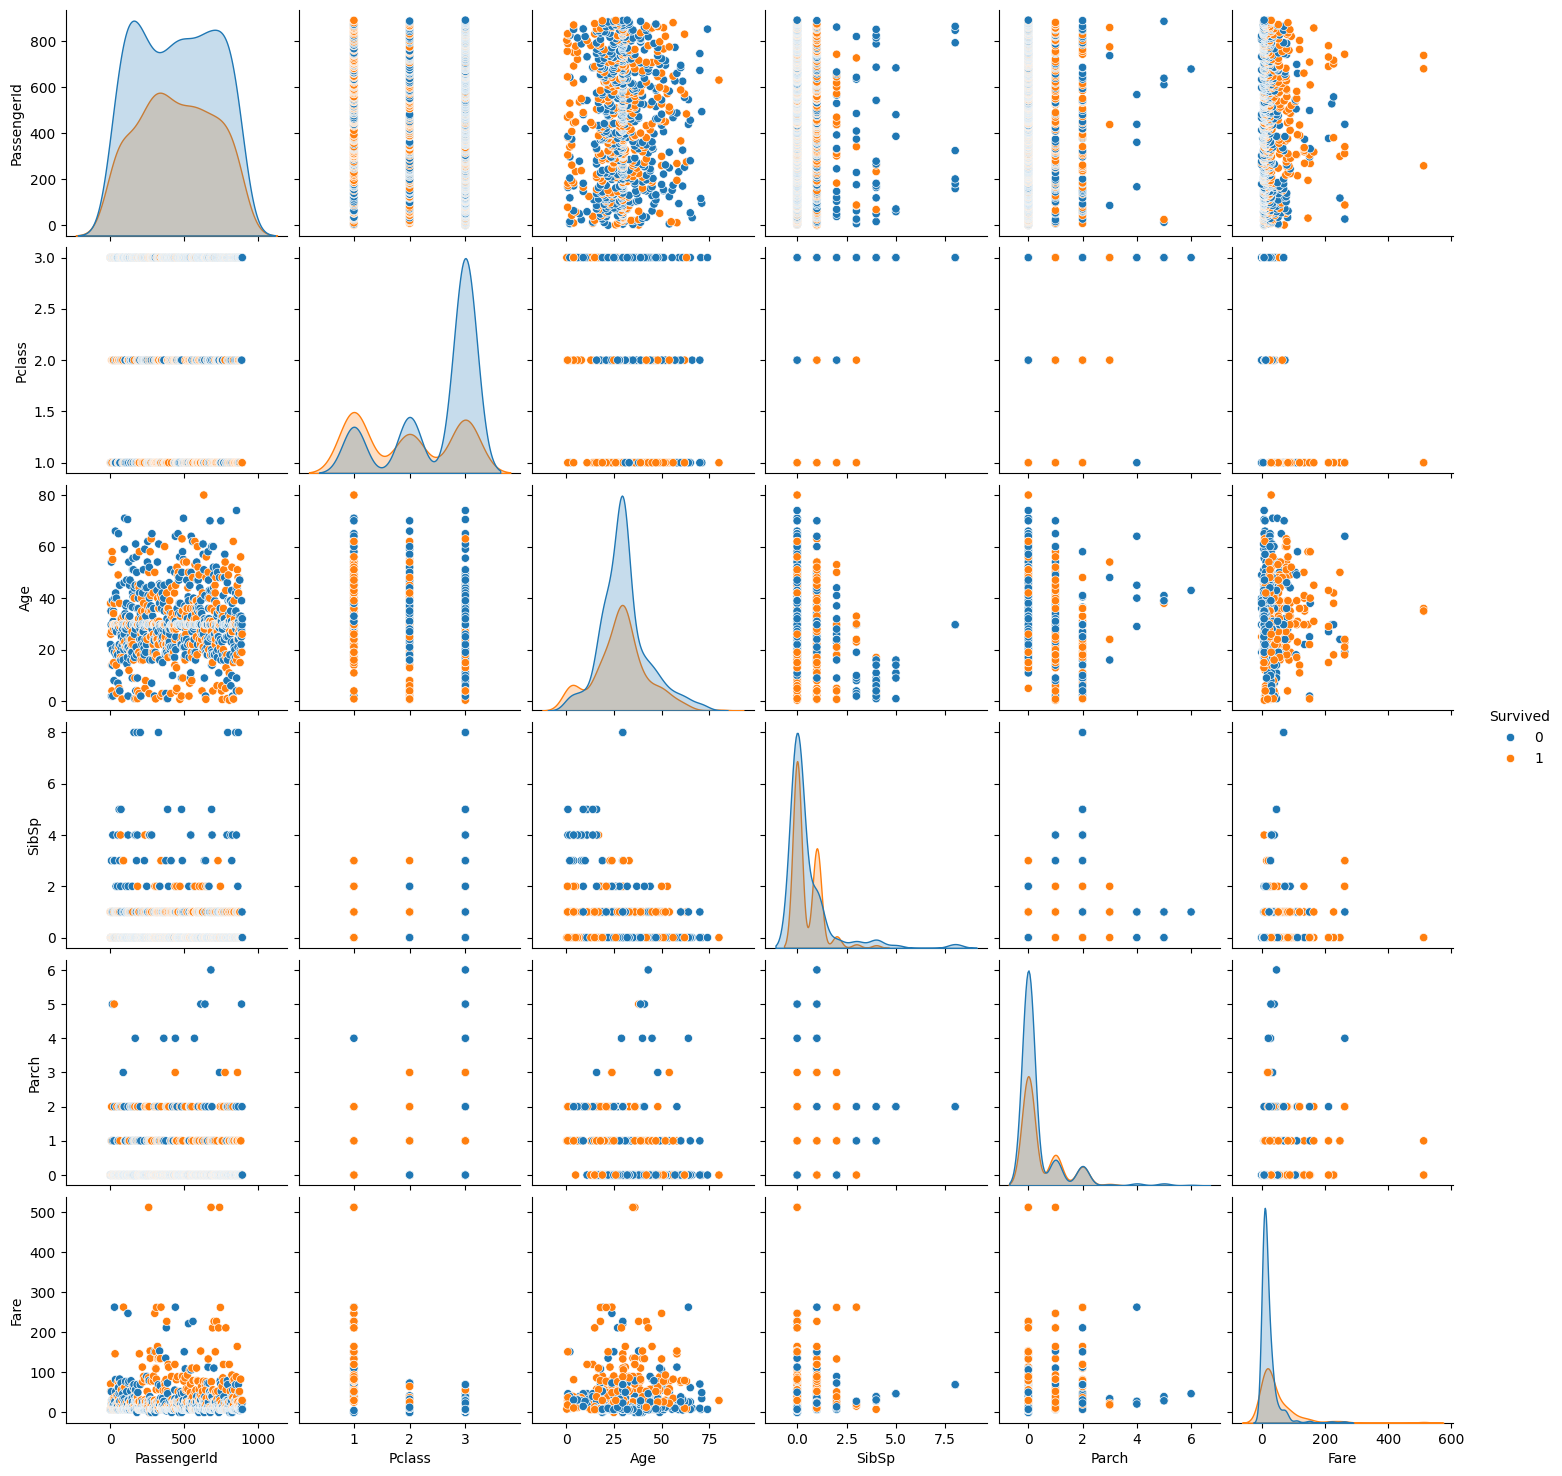

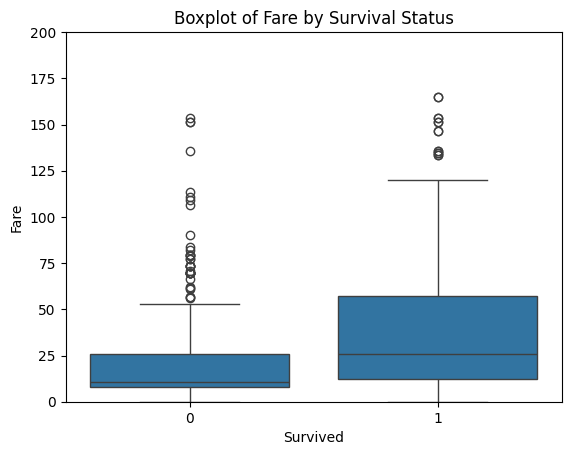

In [52]:
# Pairplot to visualize the relationship between features
sns.pairplot(train_df, hue='Survived')
plt.show()

# Boxplot to examine the fare distribution by survival
sns.boxplot(x='Survived', y='Fare', data=train_df)
plt.title('Boxplot of Fare by Survival Status')
plt.ylim(0, 200)  # Limiting Fare axis for better clarity
plt.show()


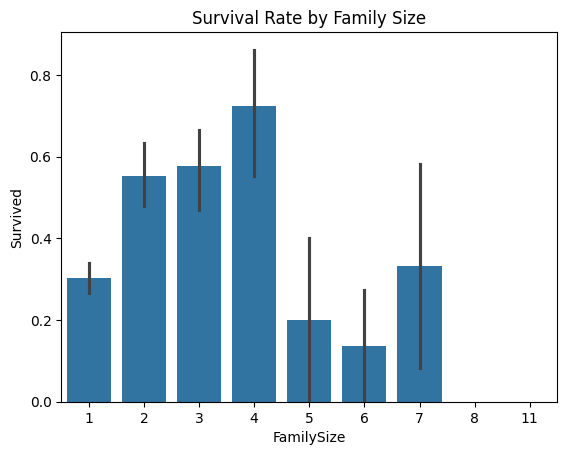

In [53]:
# Feature Engineering

# Creating a new feature 'FamilySize' from 'SibSp' + 'Parch' + 1 (including oneself)
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

# Visualize the impact of FamilySize on survival
sns.barplot(x='FamilySize', y='Survived', data=train_df)
plt.title('Survival Rate by Family Size')
plt.show()


In [54]:
# Converting 'Sex' into a binary variable (0 = male, 1 = female)
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

# Checking the transformation
print(train_df[['Sex']].head())


   Sex
0    0
1    1
2    1
3    1
4    0


In [55]:
# Filling missing 'Age' values with the median age
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)


/tmp/ipykernel_24818/2360048451.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)


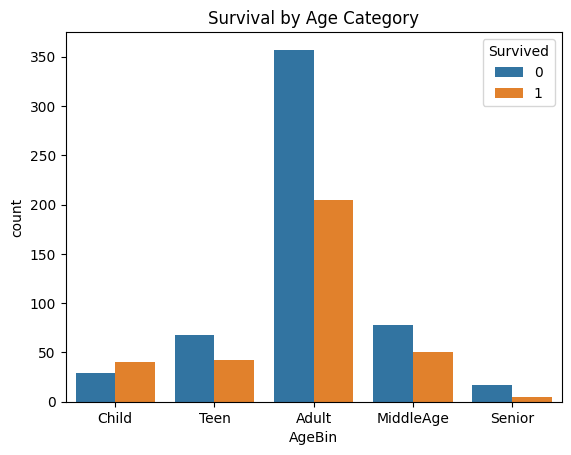

In [56]:
# Binning age into categories
train_df['AgeBin'] = pd.cut(train_df['Age'], bins=[0, 12, 20, 40, 60, 120], labels=['Child', 'Teen', 'Adult', 'MiddleAge', 'Senior'])

# Visualizing the effect of AgeBin on survival
sns.countplot(x='AgeBin', hue='Survived', data=train_df)
plt.title('Survival by Age Category')
plt.show()


In [57]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,AgeBin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,2,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,2,Adult
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,2,Adult
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,1,Adult


In [58]:
# One-hot encoding the 'Embarked' column
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)

# removing unnecessary columns name , ticket and passengerId 
train_df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


# Normalize the 'Age' and 'Fare' columns
scaler = MinMaxScaler()
train_df[['Age', 'Fare']] = scaler.fit_transform(train_df[['Age', 'Fare']])

train_df['AgeBin'] = train_df['AgeBin'].astype('category').cat.codes


# Print the updated dataframe
print(train_df)


     Survived  Pclass  Sex       Age  SibSp  Parch      Fare  FamilySize  \
0           0       3    0  0.271174      1      0  0.014151           2   
1           1       1    1  0.472229      1      0  0.139136           2   
2           1       3    1  0.321438      0      0  0.015469           1   
3           1       1    1  0.434531      1      0  0.103644           2   
4           0       3    0  0.434531      0      0  0.015713           1   
..        ...     ...  ...       ...    ...    ...       ...         ...   
886         0       2    0  0.334004      0      0  0.025374           1   
887         1       1    1  0.233476      0      0  0.058556           1   
888         0       3    1  0.367921      1      2  0.045771           4   
889         1       1    0  0.321438      0      0  0.058556           1   
890         0       3    0  0.396833      0      0  0.015127           1   

     AgeBin  Embarked_Q  Embarked_S  
0         2       False        True  
1         2

In [59]:
# Splitting the dataset into features and target variable
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and test datasets
print(X_train.shape)
print(X_test.shape)




(712, 10)
(179, 10)


In [60]:
# Model Building

# Importing the necessary libraries


# Logistic Regression
# Create an instance of the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
print('Logistic Regression Model')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


# Random Forest
# Create an instance of the model
rf = RandomForestClassifier()

# Fit the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print('Random Forest Model')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


# Support Vector Machine
# Create an instance of the model
svc = SVC()

# Fit the model
svc.fit(X_train, y_train)

# Make predictions
y_pred = svc.predict(X_test)

# Evaluate the model
print('Support Vector Machine Model')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))




Logistic Regression Model
Accuracy: 0.8044692737430168
Confusion Matrix:
 [[88 17]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

Random Forest Model
Accuracy: 0.8100558659217877
Confusion Matrix:
 [[89 16]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Support Vector Machine Model
Accuracy: 0.8156424581005587
Confusion Matrix:
 [[92 13]
 [20 54]]
Classification Report:

In [61]:
# Support Vector Machine
# Create an instance of the model
svc = SVC()

# Fit the model
svc.fit(X_train, y_train)

# Make predictions
y_pred = svc.predict(X_test)

# Evaluate the model
print('Support Vector Machine Model')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Support Vector Machine Model
Accuracy: 0.8156424581005587
Confusion Matrix:
 [[92 13]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

